In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(axis, data):
    pass


def save_fig(fname):
    os.makedirs(os.path.dirname(fname), exist_ok=True)
    plt.savefig(fname)

    
def down_sample(data, samples=300):
    new_data = [[], []]
    n = len(data[0])
    per_sample = n//samples
    for i in range(n):
        if (i%per_sample == 0) or (i+1 == n):
            new_data[0].append(data[0][i])
            new_data[1].append(data[1][i])
    return new_data

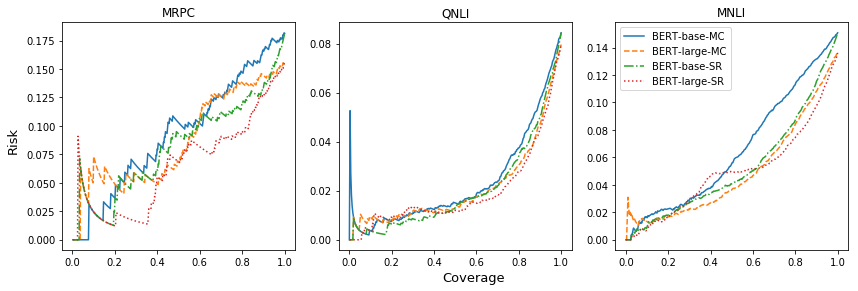

In [3]:
datasets = ['MRPC', 'QNLI', 'MNLI']
linestyles = ['-', '--', '-.', ':']

fig, axes = plt.subplots(1, len(datasets), figsize=[12,4])

for i, ds in enumerate(datasets):
    ls_count = 0
    for method in ['MC', 'SR']:
        for model_size in ['base', 'large']:
            data = np.load(f'saved_data/{ds}/bert-{model_size}-uncased-{method}-rcc.npy', allow_pickle=True)
            data = down_sample(data)
            axes[i].plot(data[0], data[1], linestyles[ls_count], label=f'BERT-{model_size}-{method}')
            ls_count += 1
    
    axes[i].set_title(ds)
    if ds == 'MNLI':
        axes[i].legend()

fig.text(0.55, 0.01, 'Coverage', ha='center', fontsize=13)
fig.text(0.01, 0.5, 'Risk', va='center', rotation=90, fontsize=13)

plt.tight_layout(rect=[0.02, 0.02, 1, 1])
save_fig('figs/rcc.pdf')